# Download Dataset

In [ ]:
!gdown --id 1jOPFeBz5GvCeFVWIsIrJ1Xn9ObVZg_ei

Downloading...
From: https://drive.google.com/uc?id=1jOPFeBz5GvCeFVWIsIrJ1Xn9ObVZg_ei
To: /content/data.zip
660MB [00:04, 147MB/s]


In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: MT-Dataset/landmarks/makeup/XYUH-025.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-039.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-040.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-042.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-046.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-061.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-062.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-070.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-071.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-074.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-080.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-085.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-088.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-117.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-119.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-124.png  
  inflating: MT-Dataset/landmarks/makeup/XYUH-132.png

In [ ]:
%rm -rf MT-Dataset/makeup_resnet/

In [ ]:
from imutils import paths
import random
import shutil
import pprint
import time
import os

from IPython import display
# initialize the path to the *original* input directory of images
ORIG_INPUT_DATASET = "/content/MT-Dataset/images"
# initialize the base path to the *new* directory that will contain our images after computing the training and testing split
BASE_PATH = "/content/MT-Dataset/makeup_resnet"
# derive the training, validation, and testing directories
TRAIN_PATH = os.path.sep.join([BASE_PATH, "train"])
VAL_PATH = os.path.sep.join([BASE_PATH, "val"])
TEST_PATH = os.path.sep.join([BASE_PATH, "testing"])

# define the amount of data that will be used training
TRAIN_SPLIT = 0.75
# the amount of validation data will be a percentage of the *training* data
VAL_SPLIT = 0.1
# define the names of the classes
CLASSES = ["makeup", "non-makeup"]

# define the path to the serialized output model after training
MODEL_PATH = "makeup_resnet.model"

# grab the paths to all input images in the original input directory and shuffle them
imagePaths = list(paths.list_images(ORIG_INPUT_DATASET))
random.seed(42)
random.shuffle(imagePaths)
# compute the training and testing split
i = int(len(imagePaths) * TRAIN_SPLIT)
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]
# we'll be using part of the training data for validation
i = int(len(trainPaths) * VAL_SPLIT)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]
# define the datasets that we'll be building
datasets = [
	("train", trainPaths, TRAIN_PATH),
	("val", valPaths, VAL_PATH),
	("testing", testPaths, TEST_PATH)
]

# loop over the datasets
for (dType, imagePaths, baseOutput) in datasets:
  # show which data split we are creating
  print("[INFO] building '{}' split".format(dType))
  # if the output base output directory does not exist, create it
  if not os.path.exists(baseOutput):
    print("[INFO] 'creating {}' directory".format(baseOutput))
    os.makedirs(baseOutput)
  # loop over the input image paths
  for i, inputPath in enumerate(imagePaths):
    # extract the filename of the input image along with its
    # corresponding class label
    filename = inputPath.split(os.path.sep)[-1]
    label = inputPath.split(os.path.sep)[-2]
    # build the path to the label directory
    labelPath = os.path.sep.join([baseOutput, label])
    # if the label output directory does not exist, create it
    if not os.path.exists(labelPath):
      print("[INFO] 'creating {}' directory".format(labelPath))
      os.makedirs(labelPath)
		# construct the path to the destination image and then copy
		# the image itself
    p = os.path.sep.join([labelPath, filename])
    shutil.copy2(inputPath, p)
    if (i % 100 == 0):
      print(str(i), "/", str(len(imagePaths)))

[INFO] building 'train' split
[INFO] 'creating /content/MT-Dataset/makeup_resnet/train' directory
[INFO] 'creating /content/MT-Dataset/makeup_resnet/train/makeup' directory
0 / 2588
[INFO] 'creating /content/MT-Dataset/makeup_resnet/train/non-makeup' directory
100 / 2588
200 / 2588
300 / 2588
400 / 2588
500 / 2588
600 / 2588
700 / 2588
800 / 2588
900 / 2588
1000 / 2588
1100 / 2588
1200 / 2588
1300 / 2588
1400 / 2588
1500 / 2588
1600 / 2588
1700 / 2588
1800 / 2588
1900 / 2588
2000 / 2588
2100 / 2588
2200 / 2588
2300 / 2588
2400 / 2588
2500 / 2588
[INFO] building 'val' split
[INFO] 'creating /content/MT-Dataset/makeup_resnet/val' directory
[INFO] 'creating /content/MT-Dataset/makeup_resnet/val/makeup' directory
0 / 287
[INFO] 'creating /content/MT-Dataset/makeup_resnet/val/non-makeup' directory
100 / 287
200 / 287
[INFO] building 'testing' split
[INFO] 'creating /content/MT-Dataset/makeup_resnet/testing' directory
[INFO] 'creating /content/MT-Dataset/makeup_resnet/testing/non-makeup' dir

In [ ]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from imageio import imread, imsave
import glob, cv2

from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.7.0+cu101
Torchvision Version:  0.8.1+cu101


In [ ]:
# Top level data directory. Here we assume the format of the directory conforms
#   to the ImageFolder structure
data_dir = "MT-Dataset/makeup_resnet"

# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "resnet"

# Number of classes in the dataset
num_classes = 2

# Batch size for training (change depending on how much memory you have)
batch_size = 128

# Number of epochs to train for
num_epochs = 50

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = True

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
  if feature_extracting:
    for param in model.parameters():
      param.requires_grad = False

In [ ]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet50
        """
        model_ft = models.resnet50(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Initializing Datasets and Dataloaders...


In [ ]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
# optimizer_ft = optim.Adam(params_to_update, lr=0.001, betas=(0.5, 0.999))

Params to learn:
	 fc.weight
	 fc.bias


In [ ]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/49
----------
train Loss: 0.3499 Acc: 0.8478
val Loss: 0.3358 Acc: 0.8293

Epoch 1/49
----------
train Loss: 0.3354 Acc: 0.8566
val Loss: 0.4161 Acc: 0.8188

Epoch 2/49
----------
train Loss: 0.3234 Acc: 0.8586
val Loss: 0.3023 Acc: 0.8676

Epoch 3/49
----------
train Loss: 0.3232 Acc: 0.8628
val Loss: 0.3090 Acc: 0.8711

Epoch 4/49
----------
train Loss: 0.3166 Acc: 0.8655
val Loss: 0.2984 Acc: 0.8780

Epoch 5/49
----------
train Loss: 0.3148 Acc: 0.8655
val Loss: 0.2969 Acc: 0.8676

Epoch 6/49
----------
train Loss: 0.3119 Acc: 0.8675
val Loss: 0.3510 Acc: 0.8293

Epoch 7/49
----------
train Loss: 0.3299 Acc: 0.8594
val Loss: 0.3003 Acc: 0.8780

Epoch 8/49
----------
train Loss: 0.3026 Acc: 0.8775
val Loss: 0.4059 Acc: 0.8362

Epoch 9/49
----------
train Loss: 0.3030 Acc: 0.8756
val Loss: 0.2935 Acc: 0.8676

Epoch 10/49
----------
train Loss: 0.2962 Acc: 0.8798
val Loss: 0.3039 Acc: 0.8397

Epoch 11/49
----------
train Loss: 0.2964 Acc: 0.8760
val Loss: 0.3107 Acc: 0.8641

Ep

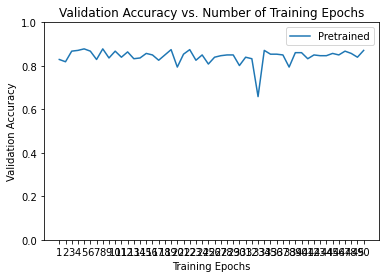

In [ ]:
# Plot the training curves of validation accuracy vs. number
# of training epochs for the transfer learning method
ohist = []

ohist = [h.cpu().numpy() for h in hist]

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1),ohist,label="Pretrained")
plt.ylim((0,1.))
plt.xticks(np.arange(1, num_epochs+1, 1.0))
plt.legend()
plt.show()

In [ ]:
test_dataset = datasets.ImageFolder(root="/content/MT-Dataset/testing",
                           transform=transforms.Compose([
                              transforms.Resize(256),
                              transforms.CenterCrop(224),
                              transforms.ToTensor(),
                              transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                            ]))

# Create the dataloader
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=128,
                                         shuffle=True, num_workers=8)

# Decide which device we want to run on
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



def calc_accuracy(model_ft):
  stats = {
    "correct": 0,
    "all": 0
  }

  for i, input_batch in enumerate(test_dataloader, 0):
    if (i % 10 == 0):
      print(i)

    if torch.cuda.is_available():
        inputs = input_batch[0].to('cuda')
        labels = input_batch[1].to('cuda')
        model_ft.to('cuda')

    with torch.no_grad():
        outputs = model_ft(inputs)

    _, preds = torch.max(outputs.data, 1)
    trueCount = len(preds) - torch.count_nonzero(torch.logical_xor(preds, labels)).cpu()
    print(trueCount)
    stats["correct"] += trueCount
    stats["all"] += len(preds)
  
  print(stats["correct"],  stats["all"])
  return stats["correct"] / stats["all"]

def visualize_model(model_ft, num_images=4):
  # Plot some training images
  real_batch = next(iter(test_dataloader))
  plt.figure(figsize=(16,16))
  plt.axis("off")
  plt.title("Test Images")
    
  inputs, labels = real_batch
  inputs, labels = inputs.cuda(), labels.cuda()
  outputs = model_ft(inputs)
  _, preds = torch.max(outputs.data, 1)
  preds = preds.cpu().numpy()
  
  for i, pred in enumerate(preds):
    if (i >= num_images):
      break
    print(i, test_dataset.classes[pred])

  plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:num_images], padding=2, normalize=True).cpu(),(1,2,0)))

# plt.ion()
# visualize_model(model_ft)
# plt.ioff()

calc_accuracy(model_ft)

0
tensor(120)
tensor(120)
tensor(110)
tensor(113)
tensor(124)
tensor(118)
tensor(114)
tensor(56)
tensor(875) 959


tensor(0.9124)

In [ ]:
#Save the model
torch.save(model_ft, "/content/drive/MyDrive/fine_tune_makeup")